# Bike Sharing Demand 

## Descriptive Statistics

### Let's import the necessary packages


In [1]:
import pandas as pd
import pickle
import numpy as np
import re
from sklearn import linear_model


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import train_test_split

### Now let's have a look at the data-set

In [2]:
Btrain = pd.read_csv(r'C:\Users\bisha\OneDrive\Pictures\train.csv', parse_dates=['datetime'])

Btest  = pd.read_csv(r'C:\Users\bisha\OneDrive\Pictures\test.csv', parse_dates=['datetime'])

Btrain.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
Btest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
Btest.shape

(6493, 9)

In [6]:
# Converting datetime from object datatype to datetime
Btrain['datetime'] = pd.to_datetime(Btrain['datetime'])
Btest['datetime'] = pd.to_datetime(Btest['datetime'])

In [7]:
Btrain.shape

(10886, 12)

In [8]:
print("The number of rows and columns in the dataset are", Btrain.shape, "respectively")

The number of rows and columns in the dataset are (10886, 12) respectively


In [9]:
print(Btrain.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [10]:
Btrain.isnull().sum() # isnull = isna

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Now, we'll remove the variables not in Test Table.

In [4]:
Btest.columns

print([i for i in Btrain.columns if i not in Btest.columns]) 

['casual', 'registered', 'count']


Hence, we have to drop these 2 columns as they won't be relevant in final prediction. 'Count' is not dropped as it's only present in test dataset.

In [5]:
Btrain = Btrain.drop(['casual','registered'], axis=1)
Btrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
Btrain['hr'] = Btrain['datetime'].dt.hour

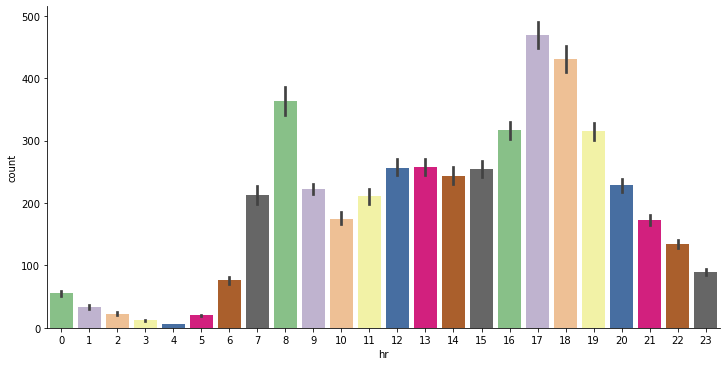

In [7]:
sns.catplot(x="hr",y="count",data=Btrain, kind='bar', palette = 'Accent', height=5 ,aspect=2)

In [15]:
Btrain['year'] = Btrain['datetime'].dt.year

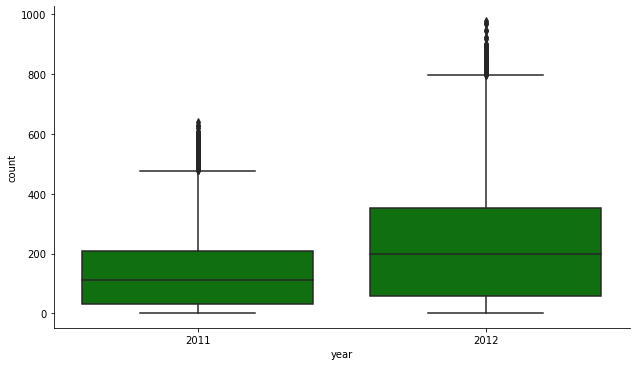

In [16]:
sns.catplot(x = "year", y="count", data=Btrain ,kind='box', color = 'Green', height = 5 ,aspect= 1.75)

### Building Correlation Matrix:

In [4]:
Btrain['year'] = Btrain['datetime'].dt.year
Btrain['month'] = Btrain['datetime'].dt.month
Btrain['day'] = Btrain['datetime'].dt.day
Btrain['hour'] = Btrain['datetime'].dt.hour
Btrain['minute'] = Btrain['datetime'].dt.minute
Btrain['second'] = Btrain['datetime'].dt.second

<AxesSubplot:>

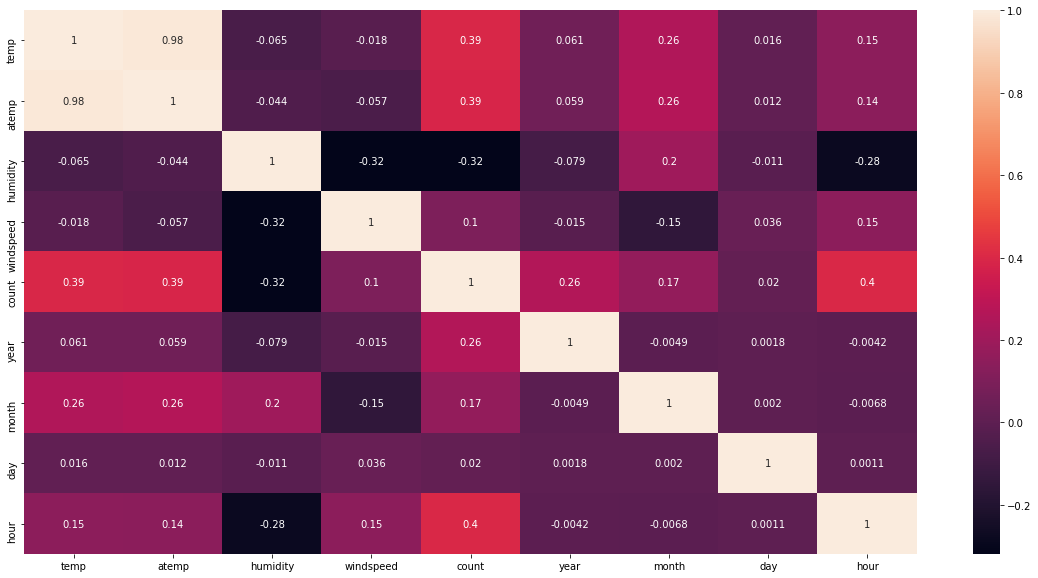

In [5]:
numeric = ["temp","atemp","humidity","windspeed","count","year","month","day","hour"]
plt.subplots(figsize=(20,10))
sns.heatmap(Btrain[numeric].corr(),annot=True)

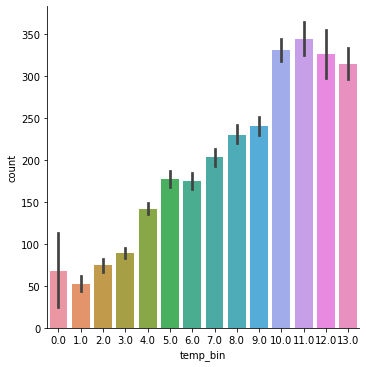

In [19]:
new_df=Btrain.copy()

new_df['temp_bin']=np.floor(new_df['temp'])//3

sns.catplot(x="temp_bin",y="count",data=new_df,kind='bar')

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Rental volume by time')]

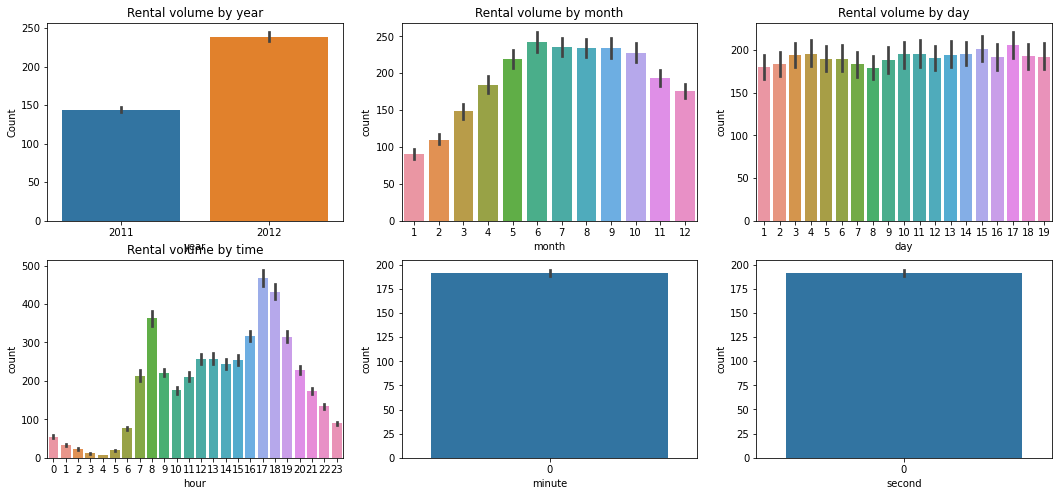

In [20]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=Btrain, x="year", y="count", ax=ax1)
sns.barplot(data=Btrain, x="month", y="count", ax=ax2)
sns.barplot(data=Btrain, x="day", y="count", ax=ax3)
sns.barplot(data=Btrain, x="hour", y="count", ax=ax4)
sns.barplot(data=Btrain, x="minute", y="count", ax=ax5)
sns.barplot(data=Btrain, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Rental volume by year")
ax2.set(xlabel='month',title="Rental volume by month")
ax3.set(xlabel='day', title="Rental volume by day")
ax4.set(xlabel='hour', title="Rental volume by time")

<AxesSubplot:xlabel='datetime'>

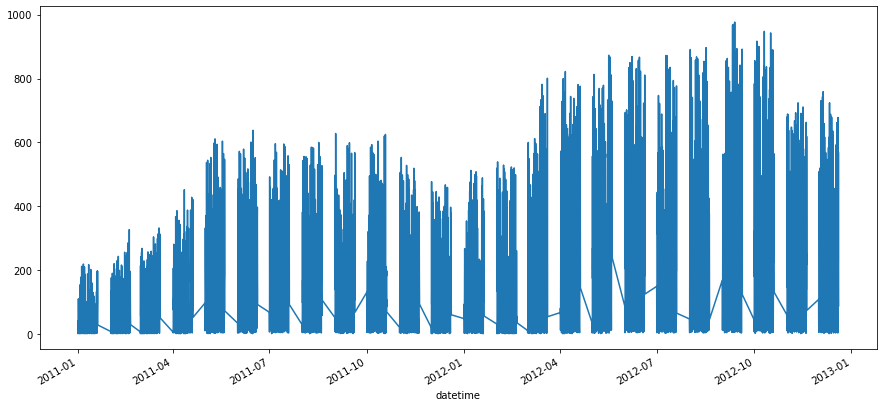

In [21]:
Btrain_date_index = Btrain.set_index('datetime')
Btrain_date_index["count"].plot(figsize=(15, 7))

In [22]:
# Plotting demand across hours for each year:

Text(0.5, 1.0, 'Demand at Different Hours across Years')

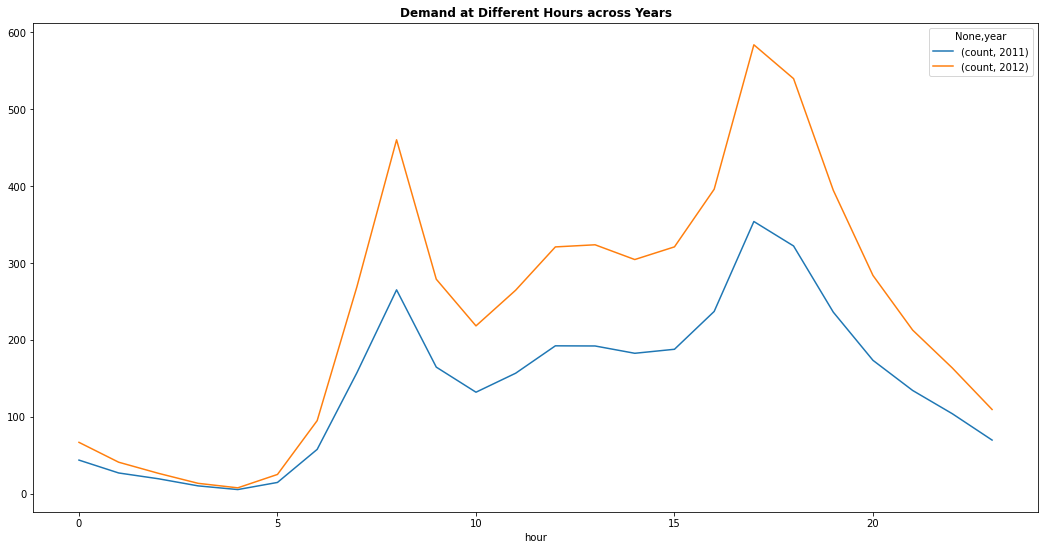

In [23]:
Btrain['hour'] = Btrain['datetime'].dt.hour
Btrain['year'] = Btrain.datetime.dt.year

piv = pd.pivot_table(Btrain, index=['hour'],columns=['year'], values=['count'])

piv.plot(figsize=(18, 9)).set_title('Demand at Different Hours across Years', fontweight="bold")

Text(0.5, 1.0, 'Count Boxplot')

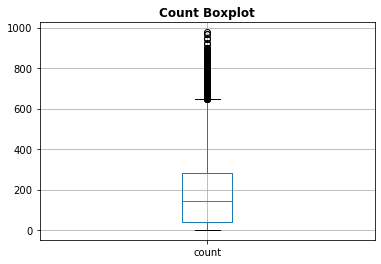

In [24]:
Btrain.boxplot(column= ["count"]).set_title('Count Boxplot', fontweight="bold")


Text(0.5, 1.0, 'Boxplots of Temp, Atemp, Weather, Humidity, and Windspeed')

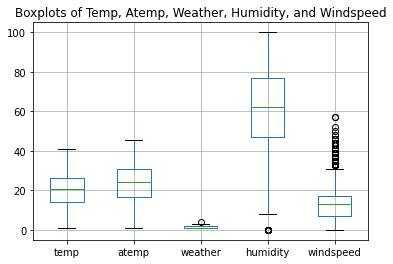

In [25]:
Btrain.boxplot(column=["temp", "atemp", "weather", 'humidity', 'windspeed']).set_title('Boxplots of Temp, Atemp, Weather, Humidity, and Windspeed') 

In [26]:
# Creating the list of features
feature_names = ['year', 'hour', 'season', 'holiday', 'workingday',
                 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X_train = Btrain[feature_names]

# Assigning the data corresponding to features in feature_names
Btest['year'] = Btest.datetime.dt.year
Btest['hour'] = Btest.datetime.dt.hour

X_test = Btest[feature_names]

In [27]:
y_train = Btrain['count']
print(y_train)

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


In [28]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='None'>

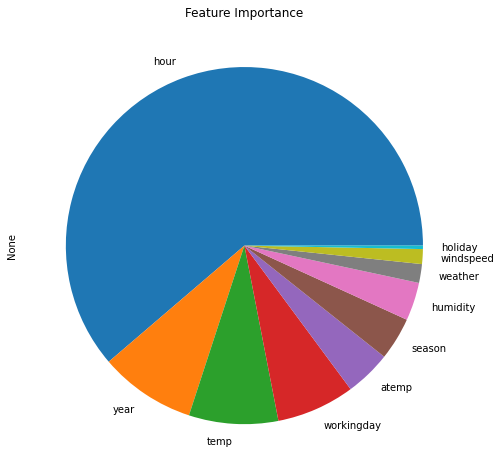

In [29]:
# Calculating feature importance
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='pie', normalize = False, title = 'Feature Importance', figsize = (8,10))

In [30]:
Sample_Sub = pd.read_csv(r'C:\Users\bisha\Videos\sampleSubmission.csv')

In [31]:
# print 
datasets = pd.concat([Sample_Sub['datetime'], pred], axis=1)
datasets.columns =['datetime', 'count']
datasets.to_csv('submission.csv', index=False)

In [32]:
datasets

,datetime,count
0,2011-01-20 00:00:00,10.840000
1,2011-01-20 01:00:00,4.860000
2,2011-01-20 02:00:00,3.580000
3,2011-01-20 03:00:00,3.943333
4,2011-01-20 04:00:00,3.030000
...,...,...
6488,2012-12-31 19:00:00,220.650000
6489,2012-12-31 20:00:00,156.890000
6490,2012-12-31 21:00:00,101.890000
6491,2012-12-31 22:00:00,106.123333


In [33]:
dataset_new = datasets.iloc[0:24, :]

dataset_new

,datetime,count
0,2011-01-20 00:00:00,10.840000
1,2011-01-20 01:00:00,4.860000
2,2011-01-20 02:00:00,3.580000
3,2011-01-20 03:00:00,3.943333
4,2011-01-20 04:00:00,3.030000
5,2011-01-20 05:00:00,7.100000
6,2011-01-20 06:00:00,38.810000
7,2011-01-20 07:00:00,105.620000
8,2011-01-20 08:00:00,244.740000
9,2011-01-20 09:00:00,126.180000


<AxesSubplot:title={'center':'Bike Demand for 24 hours on 20th Jan 2011'}>

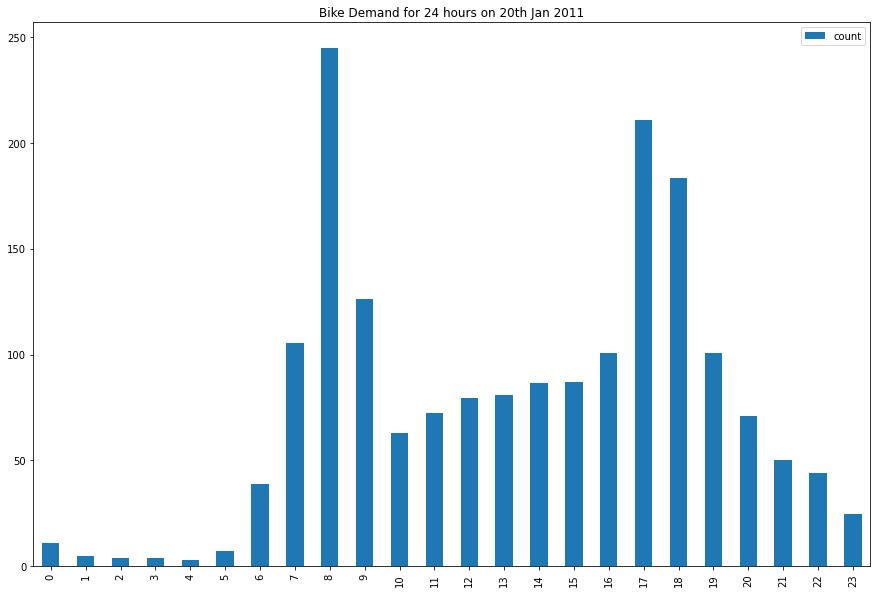

In [34]:
dataset_new.plot(title = 'Bike Demand for 24 hours on 20th Jan 2011', kind = 'bar', figsize = (15,10))

In [35]:
# Results & Inferences

In [36]:
# Regression:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [14]:
lr = LinearRegression()

In [39]:
# Creating X and y
X1 = Btrain['hour']
y1= Btrain['count']

In [40]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [41]:
# Take a look at the train dataset
X1_train
y1_train

1378     33
7855    466
1715    102
5535    383
3543    176
       ... 
350      16
79       57
8039    653
6936    123
5640      4
Name: count, Length: 8708, dtype: int64

In [42]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X1_train_sm = sm.add_constant(X1_train)

In [43]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y1_train, X1_train_sm).fit()

# Printing the parameters
lr.params

const    72.525545
hour     10.443534
dtype: float64

In [44]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     1616.
Date:                Sun, 01 May 2022   Prob (F-statistic):          4.94e-324
Time:                        20:21:46   Log-Likelihood:                -56940.
No. Observations:                8708   AIC:                         1.139e+05
Df Residuals:                    8706   BIC:                         1.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5255      3.495     20.750      0.000      65.674      79.377
hour          10.4435      0.260     40.202      0.000       9.934      10.953
==============================================================================
Omnibus:                     1812.285   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3505.528
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       4.796   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

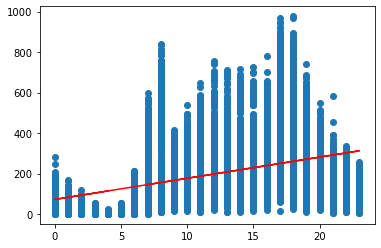

In [45]:
# Visualizing the regression line
plt.scatter(X1_train, y1_train)
plt.plot(X1_train, 72.5255 + 10.4435*X1_train, 'r')
plt.show()

## The other one:

In [15]:
feature_names = ['year', 'hour', 'season', 'holiday', 'workingday',
                 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X = Btrain[feature_names]

# Assigning the data corresponding to features in feature_names
Btest['year'] = Btest.datetime.dt.year
Btest['hour'] = Btest.datetime.dt.hour

X_test = Btest[feature_names]

y = Btrain['count']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
#Root Mean Squared Logarithmic Error

from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [18]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(train_pred, y_train)
val_score = RMSLE(val_pred ,y_val)

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 1.157796202346488
validation score: 1.1474615432151656


<ipython-input-17-b2afeeaee2a6>:6: RuntimeWarning: invalid value encountered in log
  RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([-28.07358301, -22.65372471, -14.66155047, ..., 212.7054066 ,
       231.66914388, 221.46017153])

In [20]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              1669.
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        18:59:41   Log-Likelihood:                         -48869.
No. Observations:                7620   AIC:                                  9.776e+04
Df Residuals:                    7610   BIC:                                  9.783e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Let's remove the unecessary variables from Regression:


In [ ]:
#Uncessary variables = One with high p-value
# Such as - working day, weather, holiday

In [ ]:

mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

In [27]:
feature_names = ['year', 'hour', 'season', 'temp', 'atemp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X = Btrain[feature_names]

# Assigning the data corresponding to features in feature_names
Btest['year'] = Btest.datetime.dt.year
Btest['hour'] = Btest.datetime.dt.hour

X_test = Btest[feature_names]

y = Btrain['count']

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [30]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(train_pred, y_train)
val_score = RMSLE(val_pred ,y_val)

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 1.1529900824634618
validation score: 1.1463442078003712


<ipython-input-29-b0cfd2f4a332>:4: RuntimeWarning: invalid value encountered in log
  RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)


In [31]:
mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              2385.
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        19:04:48   Log-Likelihood:                         -48870.
No. Observations:                7620   AIC:                                  9.775e+04
Df Residuals:                    7613   BIC:                                  9.780e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------